In [7]:
%load_ext autoreload
%autoreload
%matplotlib inline
import rasterio
import sys
sys.path.insert(0, "..")
import src.satellite_analyze
import src.plot
import src.models.models

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load you tiff file

In [8]:
# grab tif
tifffile = '/app/data/raw/athens_satellite.tif'
ds_all = rasterio.open(tifffile)

# Specify some region to plot

In [11]:
# select subset for plotting
r_start = ds_all.height // 2
c_start = ds_all.width // 2
delta = 400
r_end = r_start + delta
c_end = c_start + delta

# Plot it

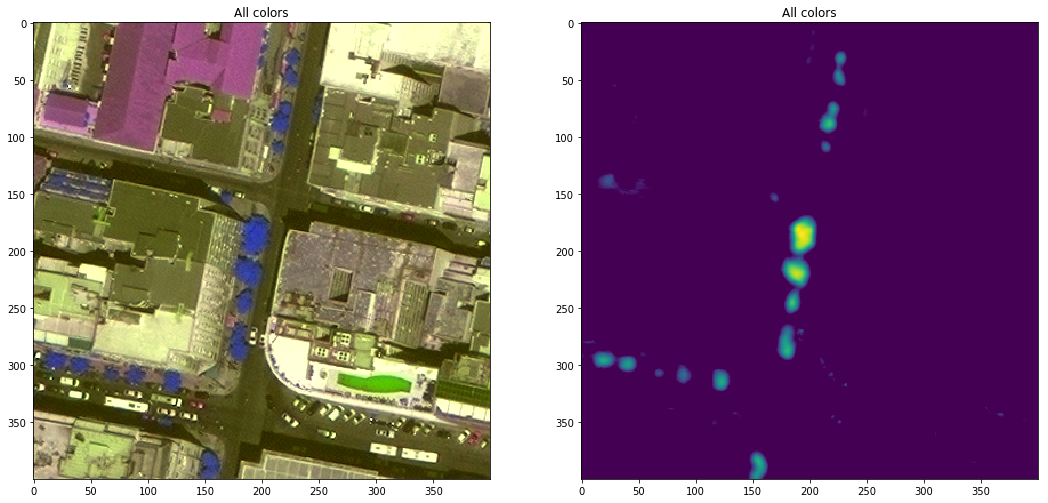

In [18]:
# get the band data
band_data = src.satellite_analyze.get_satellite_subset(ds_all, 
                                                       r_start, 
                                                       r_end, 
                                                       c_start, 
                                                       c_end,
                                                       norm=255)
# get tree data
plant_data = src.satellite_analyze.get_tree_finder_image(band_data)
# get peaks
trees_local = src.models.models.detect_peaks(plant_data)
# plot
src.plot.plot_satellite_image(band_data.astype(int), plant_data, plot_all=False,
                              tree_loc=None, colorbands=[0,1,3])